In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# explore data
inspector = inspect(engine)

# get tables from db
tables = inspector.get_table_names()

# add for loop
for table in tables:
        print(table)
        columns = inspector.get_columns(table)
        for column in columns:
            print(column["name"], column["type"])
            
print()

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



-- The below cells are Raw SQL queries for practice as this is what I am most familiar with. The ORM queries begin in cell 24

In [6]:
#add query in raw SQL for practice

query = "Select max(date) from measurement;"

data = engine.execute(text(query))
for record in data:
    print (record)

('2017-08-23',)


In [7]:
#add another query
query2 = """Select date, station, prcp 
                From measurement 
                Where date >= '2016-08-23'; 
"""

df = pd.read_sql(text(query2), con = engine)
df.head()

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-24,USC00519397,0.08
2,2016-08-25,USC00519397,0.08
3,2016-08-26,USC00519397,0.00
4,2016-08-27,USC00519397,0.00


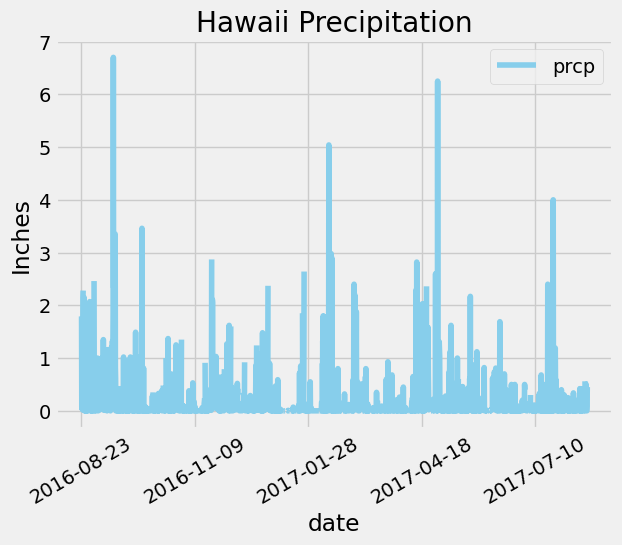

In [8]:
#plot precipitation
df = df.sort_values(by="date")

df.plot(kind="line", x="date", y="prcp", title="Hawaii Precipitation", ylabel="Inches", rot = 30, color = "skyblue")

plt.show()

In [9]:
df.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [10]:
query3 = """Select station, 
                count(id) as num_obs
                From measurement
                Group By station
                Order By num_obs;
                
"""

df2 = pd.read_sql(text(query3), con = engine)
df2.head()

,station,num_obs
0,USC00518838,511
1,USC00517948,1372
2,USC00511918,1979
3,USC00514830,2202
4,USC00516128,2612


In [11]:
#another query
query4 = """Select min(tobs), max(tobs), avg(tobs)
                From measurement 
                Where station = 'USC00519281'; 
"""

df3 = pd.read_sql(text(query4), con = engine)
df3.head()

,min(tobs),max(tobs),avg(tobs)
0,54.0,85.0,71.663781


In [15]:
# adding another query
query5 = """Select date, station, tobs 
                From measurement 
                Where date >= '2016-08-23' And station = 'USC00519281'; 
"""

df4 = pd.read_sql(text(query5), con = engine)
df4.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


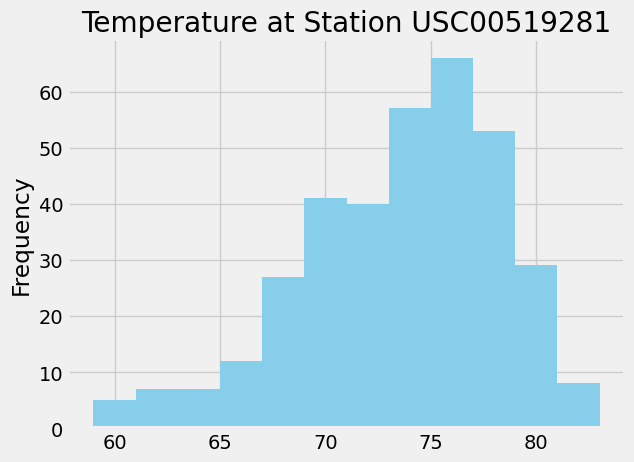

In [16]:
# add histogram
df4.tobs.plot.hist(bins=12, title="Temperature at Station USC00519281", ylabel="Frequency", color = "skyblue")
plt.show()


In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).all()

[('2017-08-23',)]

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
data = session.query(Measurement.date, Measurement.station, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
df = pd.DataFrame(data, columns=["date", "station", "prcp"])

df.head()

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-24,USC00519397,0.08
2,2016-08-25,USC00519397,0.08
3,2016-08-26,USC00519397,0.00
4,2016-08-27,USC00519397,0.00


In [32]:

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


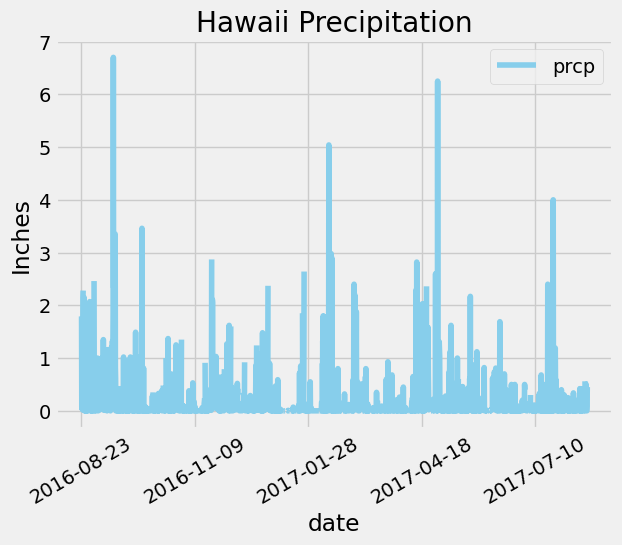

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data
df = df.sort_values(by="date")

df.plot(kind="line", x="date", y="prcp", title="Hawaii Precipitation", ylabel="Inches", rot = 30, color = "skyblue")

plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data2 = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.date >= '2016-08-23').filter(Measurement.station == 'USC00519281').all()

df2 = pd.DataFrame(data2, columns=["date", "station", "tobs"])

df2.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


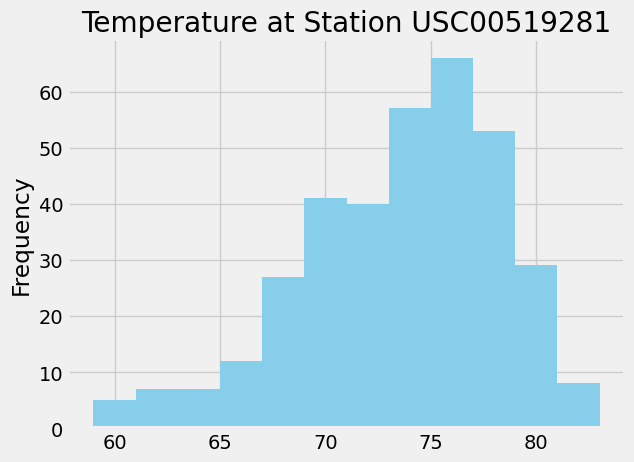

In [43]:
# plot results as histogram
df2.tobs.plot.hist(bins=12, title="Temperature at Station USC00519281", ylabel="Frequency", color = "skyblue")
plt.show()

# Close Session

In [44]:
# Close Session
session.close()